In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
import seaborn as sn
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA

In [2]:
#dataread

SP_df = pd.read_csv('Q3/SP500financials.csv')
VC_df = pd.read_csv('Q3/vehicles.csv')

In [3]:
SP_df.head(2)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doPCA(data):
  
  #data = data.drop(['Name'], axis = 1)
  #data = data.drop(['Symbol'], axis = 1)
  #data = data.drop(['Sector'], axis = 1)
  #data = data.drop(['SEC Filings'], axis = 1)
  #data = data.dropna()
  norm = StandardScaler().fit_transform(data)
  pca = PCA()
  newdata = pca.fit_transform(norm)
  return newdata,pca

#a,b = doPCA(SP_df)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doPCA1(data):
  
  #data = data.drop(['Name'], axis = 1)
  #data = data.drop(['Symbol'], axis = 1)
  #data = data.drop(['Sector'], axis = 1)
  #data = data.drop(['SEC Filings'], axis = 1)
  data = data.dropna()
  norm = StandardScaler().fit_transform(data)
  pca = PCA()
  newdata = pca.fit_transform(norm)
  return newdata,pca

#a,b = doPCA(SP_df)

In [6]:
def doTSNE(data,k):

    l = data.index
    s_data = StandardScaler().fit_transform(data)

    model = TSNE(n_components = 3 , perplexity=k, random_state = 0)

    tsne_data = model.fit_transform(s_data)

    #tsne_data = np.vstack((tsne_data.T, l)).T
    
    return tsne_data

n = doTSNE(VC_df,20)

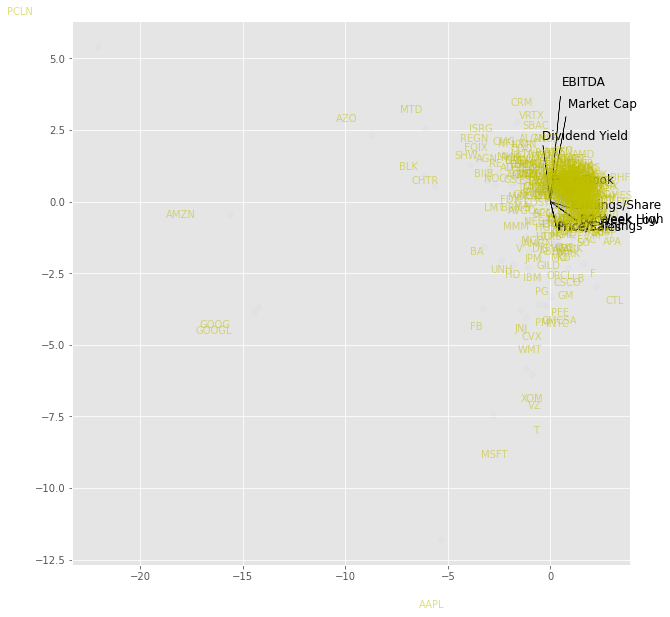

In [21]:
def DD(data):
    
    d = data
    
    data = data.drop(['Name'], axis = 1)
    data = data.drop(['Symbol'], axis = 1)
    data = data.drop(['Sector'], axis = 1)
    data = data.drop(['SEC Filings'], axis = 1)
    
    
    n,pca = doPCA1(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(8,8))

    for i in range(len(n)):
        plt.scatter(n[i,0],n[i,1], c = 'y')
        plt.text(n[i,0],n[i,1],d.Symbol[i], c = 'y')

    sc = 10
    for k in range(PC_df.shape[1]):
        plt.text(  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05 , PC_df.index[k] , c= 'r')
        plt.arrow( 0,0,  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05   , color= 'k')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
DD(SP_df)

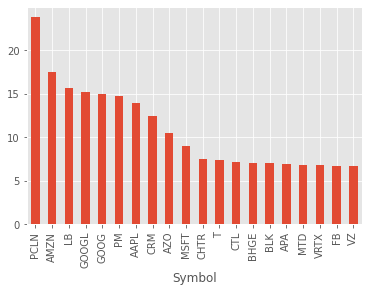

In [8]:
##PCA 


def do(data):
    
    
    
    data = data.dropna()
    d = data
    data = data.drop(['Name'], axis = 1)
    data = data.drop(['Symbol'], axis = 1)
    data = data.drop(['Sector'], axis = 1)
    data = data.drop(['SEC Filings'], axis = 1)
    

    AAPL = data
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Symbol)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    
    
do(SP_df)   


In [10]:
def imp(data) :
    
    d = data
    
    data = data.drop(['Name'], axis = 1)
    data = data.drop(['Symbol'], axis = 1)
    data = data.drop(['Sector'], axis = 1)
    data = data.drop(['SEC Filings'], axis = 1)
    
    
    n,pca = doPCA1(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    PC_dim = PC_df
    
    weight = pca.explained_variance_ratio_
    #print(weight)
    
    PC_dim["Feature Importance "] = (PC_dim**2).apply(lambda x : np.sqrt(x.dot(weight)), axis = 1 )
    
    PC_dim = PC_dim.round(decimals=2)
    
    return PC_dim
    
PC_dim = imp(SP_df)
PC_dim

,0,1,2,3,4,5,6,7,8,9,Feature Importance
Price,0.49,0.12,-0.14,0.35,0.49,0.49,0.29,0.18,0.11,0.02,0.39
Price/Earnings,-0.12,-0.16,0.36,-0.04,-0.13,-0.12,0.55,0.68,-0.17,0.11,0.23
Dividend Yield,-0.08,0.61,-0.28,-0.38,-0.08,-0.13,0.27,0.15,0.52,-0.10,0.30
Earnings/Share,0.03,0.07,0.31,-0.02,0.03,0.03,-0.09,-0.12,0.33,0.88,0.12
52 Week Low,-0.04,0.35,-0.51,0.04,-0.05,-0.08,0.05,0.06,-0.65,0.42,0.23
52 Week High,0.03,0.67,0.63,0.14,0.02,0.03,-0.13,-0.08,-0.27,-0.19,0.35
Market Cap,0.24,-0.10,0.14,-0.82,0.24,0.23,0.10,-0.17,-0.28,0.01,0.33
EBITDA,-0.05,-0.04,0.06,0.18,-0.07,-0.14,0.71,-0.66,-0.03,-0.01,0.20
Price/Sales,0.46,-0.03,0.02,0.01,0.37,-0.81,-0.06,0.04,0.00,-0.01,0.38
Price/Book,-0.68,0.01,0.00,0.01,0.73,-0.06,0.01,-0.00,-0.01,-0.00,0.47


In [36]:
##PCA 


def do(data):
    
    
    
    data = data.dropna()
    d = data
    data = data.drop(['Name'], axis = 1)
    data = data.drop(['Symbol'], axis = 1)
    data = data.drop(['Sector'], axis = 1)
    data = data.drop(['SEC Filings'], axis = 1)
    

    AAPL = data
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Symbol)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:10]
    #print(ranking_20)
    
    return ranking_20
    
r = do(SP_df)   

r = r.index
r

Index(['PCLN', 'AMZN', 'LB', 'GOOGL', 'GOOG', 'PM', 'AAPL', 'CRM', 'AZO',
       'MSFT'],
      dtype='object', name='Symbol')

In [22]:
z  = SP_df.loc[SP_df['Symbol'] == 'LB']

z.iloc[: , -1]

275    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object

In [35]:
for i in range(0,len(r)):
    
    print (r[i])
    
    z  = SP_df.loc[SP_df['Symbol'] == r[i]]

    print(z.iloc[: , -1])

PCLN
372    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object
AMZN
30    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object
LB
275    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object
GOOGL
27    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object
GOOG
28    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object
PM
363    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object
AAPL
51    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object
CRM
403    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object
AZO
61    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object
MSFT
311    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, dtype: object


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doSPCA(data):

  norm = StandardScaler().fit_transform(data)
  spca = SparsePCA(n_components=3, random_state=123)
  pc = spca.fit_transform(norm) 
  n = spca.transform(norm)
  return n,pc

#n,pc = doSPCA(SP_df)

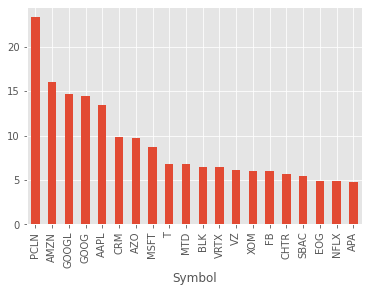

In [53]:
##SPCA 


def do(data):
    
    data = data.dropna()
    d = data
    data = data.drop(['Name'], axis = 1)
    data = data.drop(['Symbol'], axis = 1)
    data = data.drop(['Sector'], axis = 1)
    data = data.drop(['SEC Filings'], axis = 1)

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n,pca = doSPCA(data)
    PC = pca
    PC_df = pd.DataFrame(data=PC)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Symbol)
    newData_df.head(1)
    df = pd.DataFrame(data = X)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    
    
do(SP_df)   


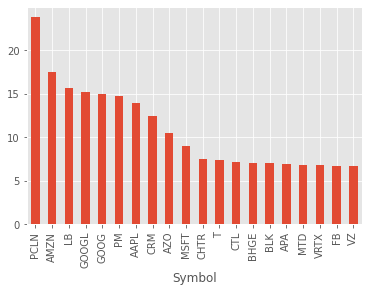

In [45]:
##NSVA 

def do(data):
    
    data = data.dropna()
    d = data
    data = data.drop(['Name'], axis = 1)
    data = data.drop(['Symbol'], axis = 1)
    data = data.drop(['Sector'], axis = 1)
    data = data.drop(['SEC Filings'], axis = 1)
    

    AAPL = data
    #AAPL = data.drop('Date',axis=1)
    from sklearn.preprocessing import StandardScaler
    AAPL = StandardScaler().fit_transform(AAPL)
    U, s, Vh = scipy.linalg.svd(abs(AAPL), full_matrices=False)
    U.shape, s.shape, Vh.shape
    X = np.dot (abs(U) , np.diag(s))
    np.shape(X)
    x = (X[:, [0]])
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Symbol)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    return x, X, Vh
    
    
x, X, Vh = do(SP_df)   



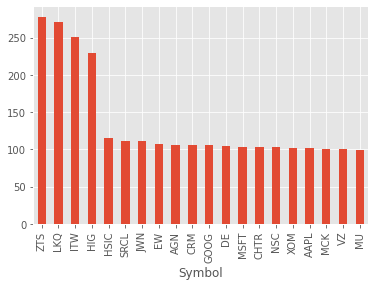

In [108]:
##TSNE


def do(data):
    
    data = data.dropna()
    d = data
    data = data.drop(['Name'], axis = 1)
    data = data.drop(['Symbol'], axis = 1)
    data = data.drop(['Sector'], axis = 1)
    data = data.drop(['SEC Filings'], axis = 1)

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n = doTSNE(data,30)
    PC = n
    PC_df = pd.DataFrame(data=PC)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Symbol)
    newData_df.head(1)
    df = pd.DataFrame(data = X)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    
    
do(SP_df)   


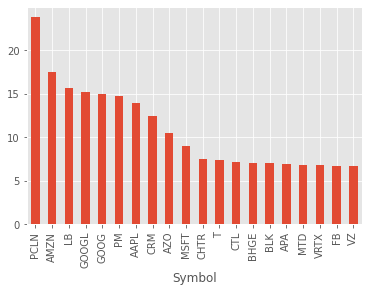

In [110]:
##TSNE


def do(data):
    
    data = data.dropna()
    d = data
    data = data.drop(['Name'], axis = 1)
    data = data.drop(['Symbol'], axis = 1)
    data = data.drop(['Sector'], axis = 1)
    data = data.drop(['SEC Filings'], axis = 1)

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Symbol)
    newData_df.head(1)
    df = pd.DataFrame(data = X)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    
    
do(SP_df)   


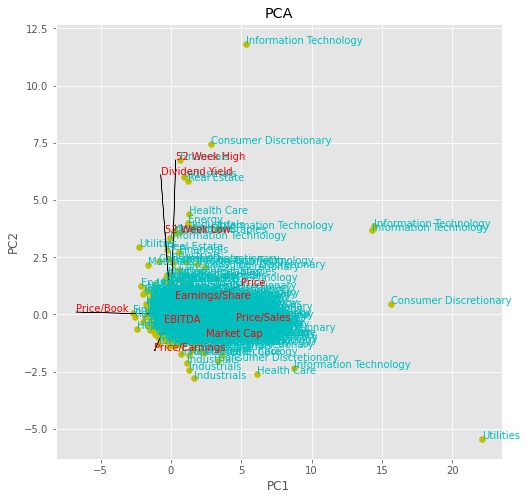

In [90]:
def DD(data):
    
    d = data
    
    data = data.drop(['Name'], axis = 1)
    data = data.drop(['Symbol'], axis = 1)
    data = data.drop(['Sector'], axis = 1)
    data = data.drop(['SEC Filings'], axis = 1)
    
    
    n,pca = doPCA1(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(8,8))

    for i in range(len(n)):
        plt.scatter(n[i,0],n[i,1], c = 'y')
        plt.text(n[i,0],n[i,1],d.Sector[i], c = 'c')

    sc = 10
    for k in range(PC_df.shape[1]):
        plt.text(  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05 , PC_df.index[k] , c= 'r')
        plt.arrow( 0,0,  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05   , color= 'k')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA")
    plt.show()
    
DD(SP_df)

C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


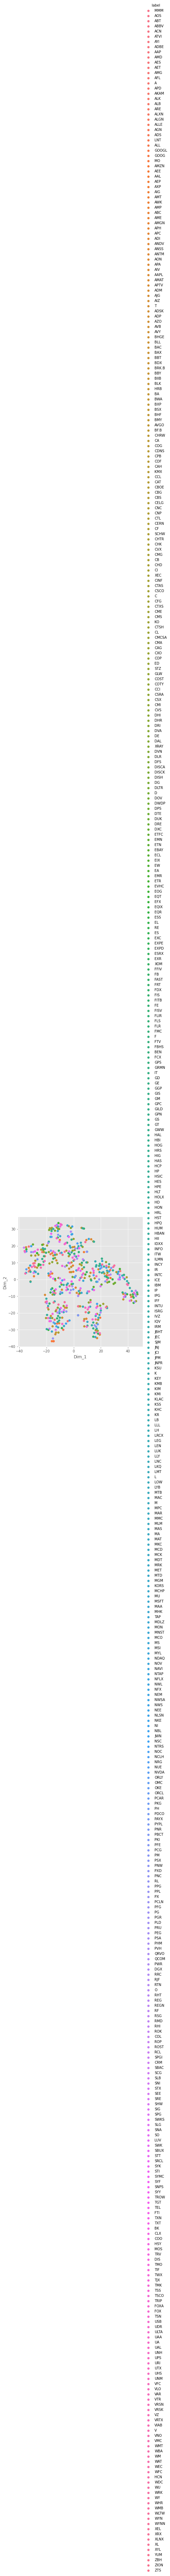

In [79]:



data = SP_df

data = data.dropna()
data = data.drop(['Name'], axis = 1)
#data = data.drop(['Symbol'], axis = 1)
data = data.drop(['Sector'], axis = 1)
data = data.drop(['SEC Filings'], axis = 1)

l = data.Symbol
data = data.drop(['Symbol'], axis = 1)
s_data = StandardScaler().fit_transform(data)

model = TSNE(n_components = 2 , perplexity=20.0, random_state = 0)

tsne_data = model.fit_transform(s_data)

tsne_data = np.vstack((tsne_data.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()


C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


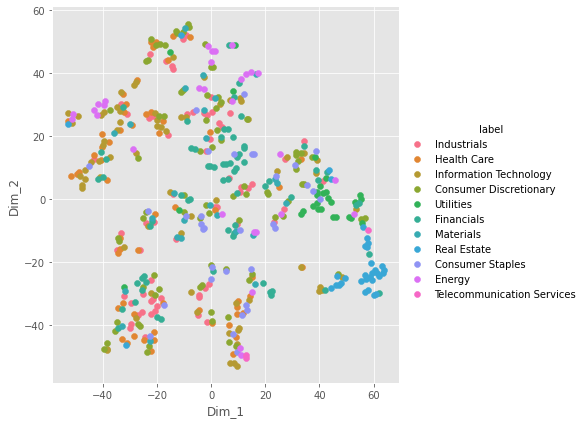

In [89]:



data = SP_df

data = data.dropna()
data = data.drop(['Name'], axis = 1)
data = data.drop(['Symbol'], axis = 1)
#data = data.drop(['Sector'], axis = 1)
data = data.drop(['SEC Filings'], axis = 1)

l = data.Sector
data = data.drop(['Sector'], axis = 1)
s_data = StandardScaler().fit_transform(data)

model = TSNE(n_components = 2 , perplexity=8.0, random_state = 0)

tsne_data = model.fit_transform(s_data)

tsne_data = np.vstack((tsne_data.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()


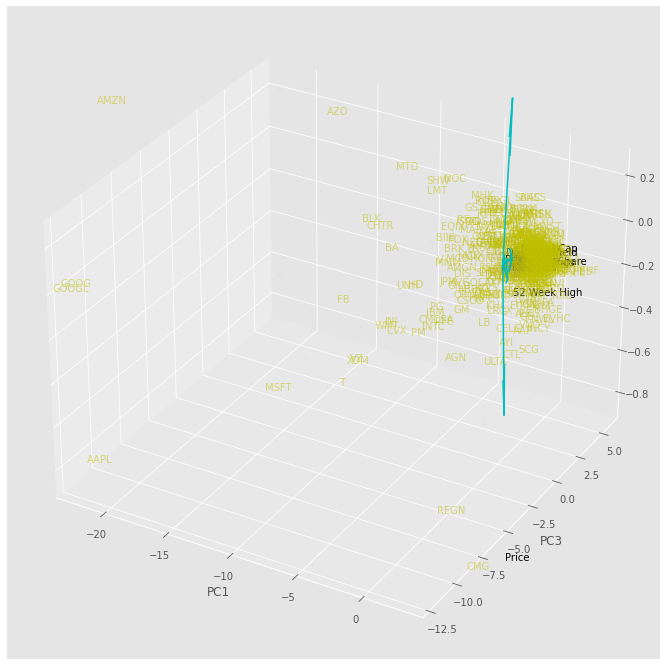

In [24]:

from mpl_toolkits import mplot3d

def DD(data):
    
    data = data.dropna()
    d = data
    data = data.drop(['Name'], axis = 1)
    data = data.drop(['Symbol'], axis = 1)
    data = data.drop(['Sector'], axis = 1)
    data = data.drop(['SEC Filings'], axis = 1)
    
    data = (data - data.mean()) / data.std()
    data = pd.DataFrame(data, columns=data.columns)
    
    data_cov = np.cov(data.T)
    #PC's and Variance
    Variance, PCs=np.linalg.eig(data_cov)
    PC = PCs
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    
    r_score = (np.dot(data,PC)) * (-1)
    
    
    x = PC[:,0] 
    y = PC[:,1]
    z = PC[:,2]
    
    scr = r_score[:, 0:5]
    
    x_sc = scr[:,0]
    y_sc = scr[:,1]
    z_sc = scr[:,2]

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(12,12))
    ax = plt.axes(projection ="3d")

    for i in range(len(x)):
        
        ax.quiver(0, 0, 0, x[i], y[i], z[i],color='c')
        ax.text(x[i] *2, y[i] *2, z[i] *2,list(data.columns.values)[i], color='k')

    for i in range(len(x_sc)):
        
        ax.scatter(x_sc[i], y_sc[i], z_sc[i], 'bo', alpha=0.01)
        ax.text(x_sc[i] * 2, y_sc[i] * 2, z_sc[i] *2, list(d.Symbol)[i], color='y', alpha=0.5)
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.ylabel("PC3")
    plt.show()
    
DD(SP_df)